In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated
from langchain_openai import ChatOpenAI
from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.graph.message import add_messages
from langgraph.checkpoint.memory import MemorySaver
import os

In [3]:
os.environ["OPENAI_API_BASE"] = "https://openrouter.ai/api/v1"
os.environ["OPENAI_API_KEY"] = "Your Own API Key"

model = ChatOpenAI(model="deepseek/deepseek-r1:free")

In [4]:
# create state
class chat_state(TypedDict):

    messages : Annotated[list[BaseMessage], add_messages]

In [5]:
# create graph
graph = StateGraph(chat_state)

In [6]:
def chat_node(state : chat_state) -> chat_state:

    # take user query from state
    messages = state['messages']

    # send too llm
    response = model.invoke(messages)

    return{'messages':response}

In [7]:
checkpointer = MemorySaver()

# add nodes
graph.add_node('chat_node', chat_node)

# add edges
graph.add_edge(START, 'chat_node')
graph.add_edge('chat_node', END)

# graph compile
chatbot = graph.compile(checkpointer=checkpointer)

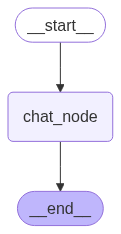

In [8]:
chatbot

In [27]:
# initial_state = {'messages':[HumanMessage(content='What is the capital of India?')]}
# chatbot.invoke(initial_state)['messages'][-1].content

In [9]:
thread_id = '1'
while True:

    user_message = input('Type here')

    print('User:', user_message)

    if user_message.strip().lower in ['exit', 'quit', 'bye']:
        break

    config = {'configurable': {'thread_id':thread_id}}

    response = chatbot.invoke({'messages':[HumanMessage(content=user_message)]}, config=config)
    print('AI:', response['messages'][-1].content)


User: hi my name is amit
AI: Hi Amit! It's nice to meet you. How can I assist you today? 😊
User: what is my name?
AI: You mentioned earlier that your name is **Amit**! Did you want to test if I was paying attention? 😊
User: can you add 100 plus 100
AI: Of course! **100 + 100 = 200**. Let me know if you need help with anything else! 😊
User: multiply result by 2
AI: Absolutely! Multiplying the previous result (**200**) by **2** gives:  
**200 × 2 = 400**.  
Let me know if you'd like to keep going! 😊
User: exit
AI: **Goodbye, Amit!** It was great chatting with you. Feel free to reach out if you need anything else in the future! 😊
User: 


KeyboardInterrupt: 